In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
dat_ansiedad=pd.read_csv("ansiedad.csv", encoding="latin1", names=["tw_de","tw_para","freq"])
dat_ansiedad

,tw_de,tw_para,freq
0,Tunja,Miedo,0
1,Sincelejo,Miedo,0
2,Ibagué,Miedo,0
3,Montería,Miedo,0
4,Bogotá,Miedo,7
...,...,...,...
85,Bucaramanga,Vulnerables,1
86,Popayán,Vulnerables,0
87,Villavicencio,Vulnerables,2
88,Valledupar,Vulnerables,1


In [3]:
mx_fr=max(dat_ansiedad.freq)

In [4]:
coord_nodes=pd.read_csv("nodes_coords.csv", index_col=0)
coord_nodes

,x_pos,y_pos
Miedo,0.392601,-0.454140
Preocupación,0.691316,-0.371084
Presión,2.164712,1.287514
Vulnerable,-1.057964,1.163442
Vulnerables,-0.191398,-0.224190
Arauca,-0.266654,-0.379940
Barranquilla,-0.266654,-0.379940
Bogotá,0.346364,-0.260144
Bucaramanga,-1.071513,1.187828
Cali,1.044486,-0.045074


In [5]:
g = nx.Graph()

In [6]:
for i, elrow in dat_ansiedad.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [7]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))


# of edges: 90
# of nodes: 23


In [8]:
for n_pos, n_node in coord_nodes.iterrows():
#     print(n_pos,n_node[0],n_node[1])
    g.add_node(n_pos,pos=(n_node[0],n_node[1]))

g.add_node("Tunja",pos=(0,0))#Tunja queda en el centro forzado porque no tenía valores de frecuencias en la tabla de contingencia léxica

In [9]:
mca_pos=nx.get_node_attributes(g,'pos')

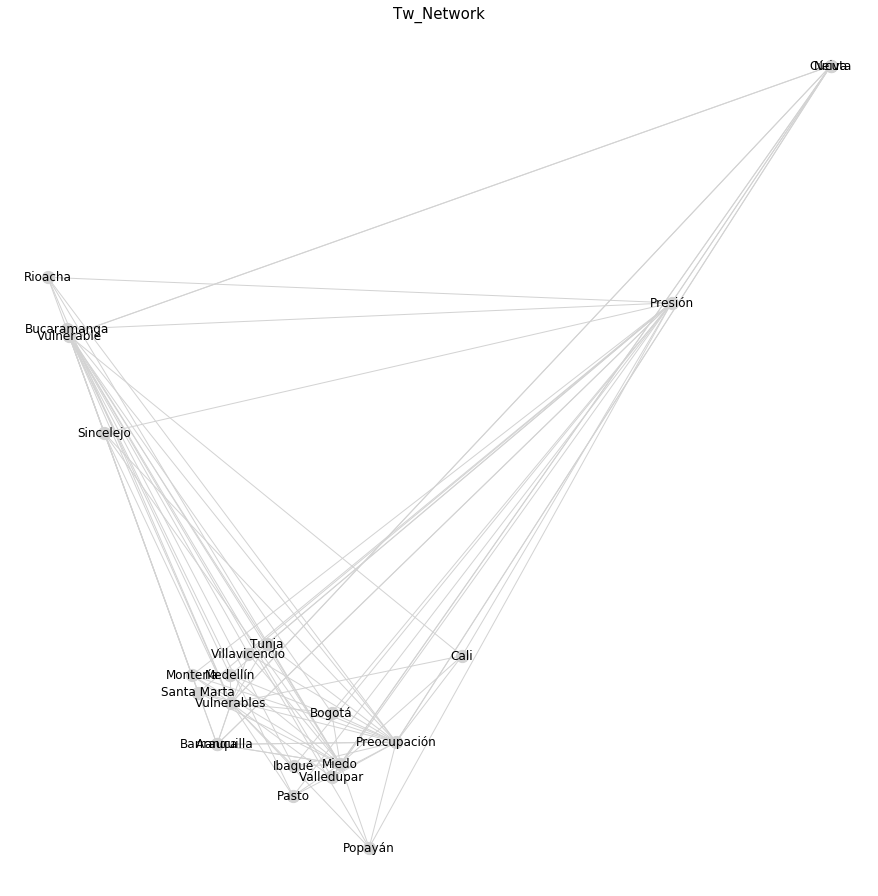

In [10]:
plt.figure(figsize=(12, 12))
nx.draw(g,
        node_size=150,
        edge_color='lightgray',
        node_color='lightgray',
        with_labels=True, 
        pos=mca_pos)
plt.title('Tw_Network', size=15)
plt.show()

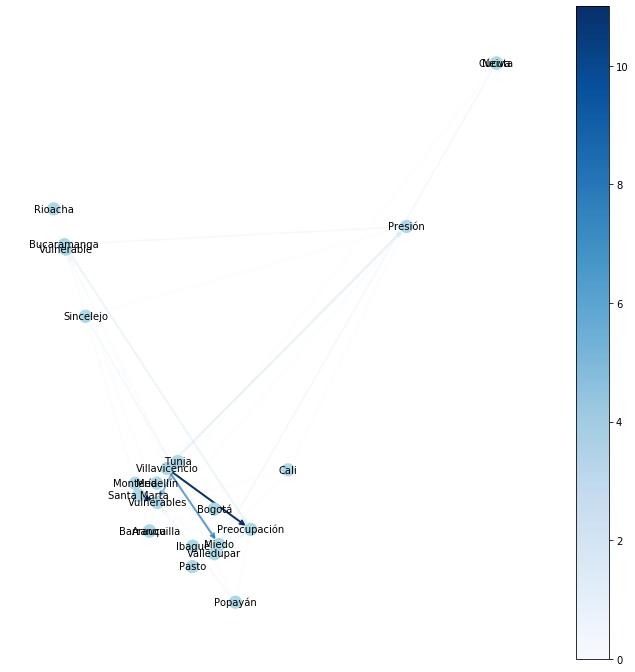

In [11]:
mx_fr=max(dat_ansiedad.freq)


G= nx.DiGraph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in dat_ansiedad.iterrows():
    G.add_edge(elrow[0], elrow[1])

pos = mca_pos#nx.layout.spring_layout(G)

node_sizes = [150 for i in range(len(G))]
M = G.number_of_edges()
edge_colors =[fr for fr in dat_ansiedad.freq]#range(2, M + 2)
edge_alphas =[fr/mx_fr for fr in dat_ansiedad.freq]#[fr/mx_fr for fr in graph_df_filt.freq]#[(5 + i) / (M + 4) for i in range(M)]

plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

nx.draw_networkx_labels(G, pos, font_size=10)

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()